Original Dataset Shape: (1797, 64) (64 features per image)

--- PCA VARIANCE ANALYSIS ---
Components: 2, Cumulative Variance Explained: 0.2159 (21.59%)
Components: 10, Cumulative Variance Explained: 0.5887 (58.87%)
Components: 30, Cumulative Variance Explained: 0.8932 (89.32%)
Components: 50, Cumulative Variance Explained: 0.9828 (98.28%)
Components: 60, Cumulative Variance Explained: 0.9992 (99.92%)


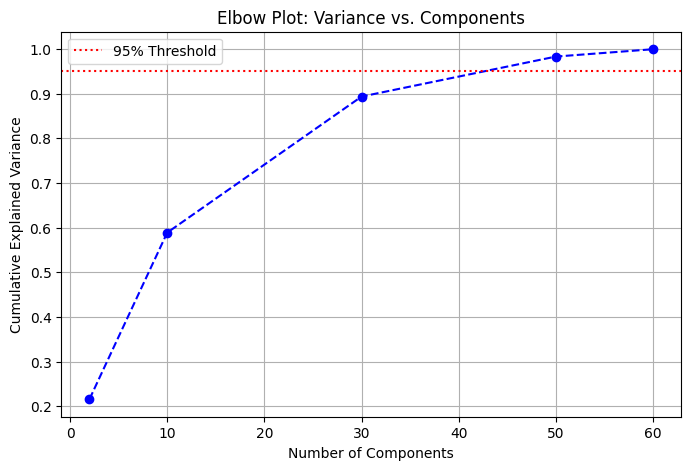


Reduced Dataset Shape: (1797, 30)


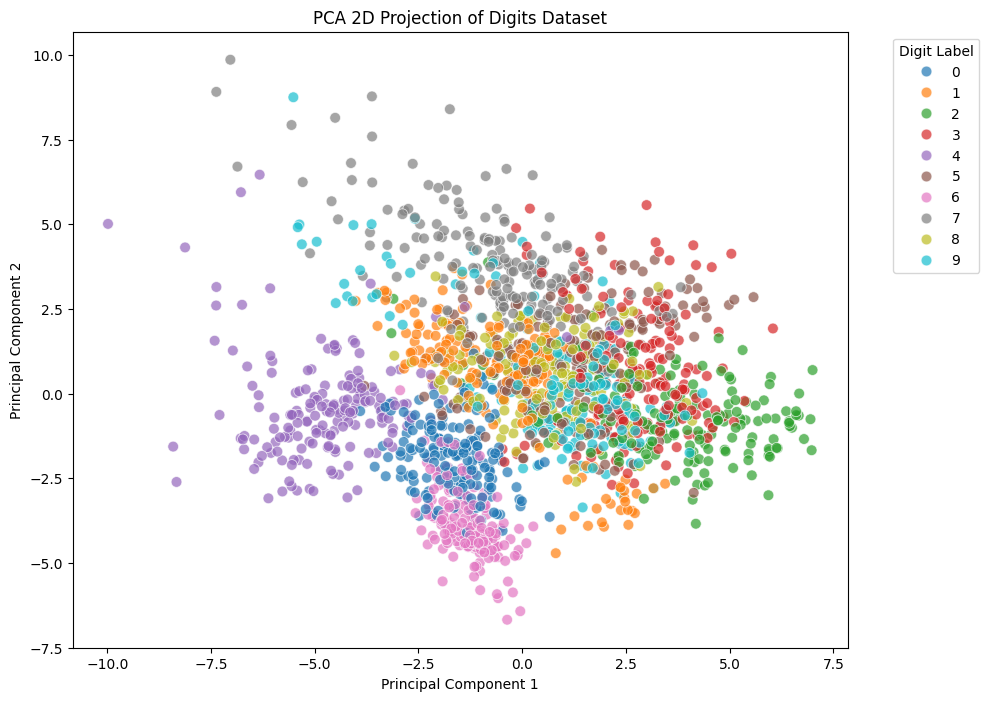


--- ACCURACY & SPEED COMPARISON ---
Original (64 features): Accuracy = 0.9722, Time = 0.5115s
PCA Reduced (30 features): Accuracy = 0.9611, Time = 0.2004s

SUCCESS: Reduced dataset saved as 'digits_pca_reduced.csv'


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import time

# 1. Load Dataset (Sklearn Digits)
digits = load_digits()
X = digits.data
y = digits.target

print(f"Original Dataset Shape: {X.shape} (64 features per image)")

# 2. Feature Scaling (Crucial for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Apply PCA with different component counts
n_components_list = [2, 10, 30, 50, 60]
explained_variances = []

print("\n--- PCA VARIANCE ANALYSIS ---")
for n in n_components_list:
    pca = PCA(n_components=n)
    pca.fit(X_scaled)
    var_ratio = np.sum(pca.explained_variance_ratio_)
    explained_variances.append(var_ratio)
    print(f"Components: {n}, Cumulative Variance Explained: {var_ratio:.4f} ({var_ratio*100:.2f}%)")

# 4. Plot Cumulative Variance
plt.figure(figsize=(8, 5))
plt.plot(n_components_list, explained_variances, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Elbow Plot: Variance vs. Components')
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle=':', label='95% Threshold')
plt.legend()
plt.show()

# 5. Transform Dataset (Choose optimal components, e.g., 30)
# We choose 30 because it typically explains >90% variance while halving the feature count
pca_final = PCA(n_components=30)
X_pca = pca_final.fit_transform(X_scaled)

print(f"\nReduced Dataset Shape: {X_pca.shape}")

# 6. Visualize PCA 2D Scatter Plot (First 2 Components)
pca_2d = PCA(n_components=2)
X_2d = pca_2d.fit_transform(X_scaled)

plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_2d[:, 0], y=X_2d[:, 1], hue=y, palette='tab10', s=60, alpha=0.7)
plt.title("PCA 2D Projection of Digits Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Digit Label", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# 7. Model Comparison: Original vs Reduced
# Split data
X_train_orig, X_test_orig, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train_pca, X_test_pca, _, _ = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Train on Original (64 features)
start = time.time()
model_orig = LogisticRegression(max_iter=1000)
model_orig.fit(X_train_orig, y_train)
acc_orig = accuracy_score(y_test, model_orig.predict(X_test_orig))
time_orig = time.time() - start

# Train on Reduced (30 features)
start = time.time()
model_pca = LogisticRegression(max_iter=1000)
model_pca.fit(X_train_pca, y_train)
acc_pca = accuracy_score(y_test, model_pca.predict(X_test_pca))
time_pca = time.time() - start

print("\n--- ACCURACY & SPEED COMPARISON ---")
print(f"Original (64 features): Accuracy = {acc_orig:.4f}, Time = {time_orig:.4f}s")
print(f"PCA Reduced (30 features): Accuracy = {acc_pca:.4f}, Time = {time_pca:.4f}s")

# 8. Save Reduced Dataset
df_pca = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(30)])
df_pca['Target'] = y
df_pca.to_csv("digits_pca_reduced.csv", index=False)
print("\nSUCCESS: Reduced dataset saved as 'digits_pca_reduced.csv'")